In [ ]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.dosm.gov.my/labour/lfs_month.parquet'
#Principal_Labour_Force:plf_df
plf_df= pd.read_parquet(URL_DATA)
if 'date' in plf_df.columns: plf_df['date'] = pd.to_datetime(plf_df['date'])

print(plf_df.head)

<bound method NDFrame.head of           date       lf  lf_employed  lf_unemployed  lf_outside  p_rate  \
0   2010-01-01  12367.9      11931.2          436.7      6927.5    64.1   
1   2010-02-01  12059.8      11632.3          427.4      7225.1    62.5   
2   2010-03-01  12324.2      11895.9          428.3      6993.0    63.8   
3   2010-04-01  12512.0      12133.5          378.5      6894.5    64.5   
4   2010-05-01  12197.6      11798.9          398.7      7186.0    62.9   
..         ...      ...          ...            ...         ...     ...   
166 2023-11-01  17000.4      16431.1          569.2      7235.4    70.1   
167 2023-12-01  17025.5      16457.7          567.8      7234.3    70.2   
168 2024-01-01  17050.3      16483.0          567.3      7233.4    70.2   
169 2024-02-01  17074.9      16507.9          567.0      7232.7    70.2   
170 2024-03-01  17098.7      16532.2          566.6      7232.5    70.3   

     ep_ratio  u_rate  
0        61.8     3.5  
1        60.3     3.5

In [ ]:
URL_DATA = 'https://storage.dosm.gov.my/labour/lfs_month_duration.parquet'
#Monthly Unemployment by Duration:mu_df
mu_df = pd.read_parquet(URL_DATA)
if 'date' in mu_df.columns: mu_df['date'] = pd.to_datetime(mu_df['date'])

print(mu_df.head)

<bound method NDFrame.head of          date  unemployed  unemployed_active  unemployed_active_3mo  \
0  2016-01-01       501.5              361.9                  180.3   
1  2016-02-01       506.4              254.0                  115.8   
2  2016-03-01       509.5              332.8                  176.8   
3  2016-04-01       511.5              328.0                  170.6   
4  2016-05-01       504.8              297.3                  153.6   
..        ...         ...                ...                    ...   
94 2023-11-01       569.2              454.5                  280.8   
95 2023-12-01       567.8              453.6                  280.2   
96 2024-01-01       567.3              452.5                  279.0   
97 2024-02-01       567.0              452.4                  278.5   
98 2024-03-01       566.6              451.5                  278.4   

    unemployed_active_6mo  unemployed_active_12mo  unemployed_active_long  \
0                   110.0               

In [ ]:
#Decent Work: dw_df

# Performing an inner join on 'EmployeeID'
dw_df = pd.merge(plf_df, mu_df, on='date', how='inner')

# Display the result
print(dw_df.head)


<bound method NDFrame.head of          date       lf  lf_employed  lf_unemployed  lf_outside  p_rate  \
0  2016-01-01  14652.0      14150.5          501.5      6984.2    67.7   
1  2016-02-01  14703.3      14196.9          506.4      7063.1    67.6   
2  2016-03-01  14710.1      14200.7          509.5      6964.0    67.9   
3  2016-04-01  14675.3      14163.7          511.5      7012.5    67.7   
4  2016-05-01  14705.0      14200.2          504.8      7021.1    67.7   
..        ...      ...          ...            ...         ...     ...   
94 2023-11-01  17000.4      16431.1          569.2      7235.4    70.1   
95 2023-12-01  17025.5      16457.7          567.8      7234.3    70.2   
96 2024-01-01  17050.3      16483.0          567.3      7233.4    70.2   
97 2024-02-01  17074.9      16507.9          567.0      7232.7    70.2   
98 2024-03-01  17098.7      16532.2          566.6      7232.5    70.3   

    ep_ratio  u_rate  unemployed  unemployed_active  unemployed_active_3mo  \
0  

In [ ]:
#drop duplicate "unemployed" as it is the same as lf_unemplolyed
dw_df=dw_df.drop(columns=['unemployed'])

print(dw_df.head)

<bound method NDFrame.head of          date       lf  lf_employed  lf_unemployed  lf_outside  p_rate  \
0  2016-01-01  14652.0      14150.5          501.5      6984.2    67.7   
1  2016-02-01  14703.3      14196.9          506.4      7063.1    67.6   
2  2016-03-01  14710.1      14200.7          509.5      6964.0    67.9   
3  2016-04-01  14675.3      14163.7          511.5      7012.5    67.7   
4  2016-05-01  14705.0      14200.2          504.8      7021.1    67.7   
..        ...      ...          ...            ...         ...     ...   
94 2023-11-01  17000.4      16431.1          569.2      7235.4    70.1   
95 2023-12-01  17025.5      16457.7          567.8      7234.3    70.2   
96 2024-01-01  17050.3      16483.0          567.3      7233.4    70.2   
97 2024-02-01  17074.9      16507.9          567.0      7232.7    70.2   
98 2024-03-01  17098.7      16532.2          566.6      7232.5    70.3   

    ep_ratio  u_rate  unemployed_active  unemployed_active_3mo  \
0       65.4   

In [ ]:
print(dw_df.dtypes)

date                      datetime64[ns]
lf                               float64
lf_employed                      float64
lf_unemployed                    float64
lf_outside                       float64
p_rate                           float64
ep_ratio                         float64
u_rate                           float64
unemployed_active                float64
unemployed_active_3mo            float64
unemployed_active_6mo            float64
unemployed_active_12mo           float64
unemployed_active_long           float64
unemployed_inactive              float64
dtype: object


In [ ]:
print(dw_df.isnull().sum())

date                      0
lf                        0
lf_employed               0
lf_unemployed             0
lf_outside                0
p_rate                    0
ep_ratio                  0
u_rate                    0
unemployed_active         0
unemployed_active_3mo     0
unemployed_active_6mo     0
unemployed_active_12mo    0
unemployed_active_long    0
unemployed_inactive       0
dtype: int64


In [ ]:
print(dw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    99 non-null     datetime64[ns]
 1   lf                      99 non-null     float64       
 2   lf_employed             99 non-null     float64       
 3   lf_unemployed           99 non-null     float64       
 4   lf_outside              99 non-null     float64       
 5   p_rate                  99 non-null     float64       
 6   ep_ratio                99 non-null     float64       
 7   u_rate                  99 non-null     float64       
 8   unemployed_active       99 non-null     float64       
 9   unemployed_active_3mo   99 non-null     float64       
 10  unemployed_active_6mo   99 non-null     float64       
 11  unemployed_active_12mo  99 non-null     float64       
 12  unemployed_active_long  99 non-null     float64     

In [ ]:
# Calculate Q1, median, and Q3
q1 = dw_df['u_rate'].quantile(0.25)
q3 = dw_df['u_rate'].quantile(0.75)
median = dw_df['u_rate'].median()

# Define categories based on quantiles
dw_df['u_rate_category'] = pd.cut(dw_df['u_rate'],
                                  bins=[dw_df['u_rate'].min() - 0.01, q1, q3, dw_df['u_rate'].max() + 0.01],
                                  labels=['Low', 'Medium', 'High'])

# Check the first few rows to see the new categorical column
print(dw_df[['u_rate', 'u_rate_category']].head())


   u_rate u_rate_category
0     3.4          Medium
1     3.4          Medium
2     3.5          Medium
3     3.5          Medium
4     3.4          Medium


In [ ]:
from google.colab import files
dw_df.to_csv('DecentWork.csv', index=False)
files.download('DecentWork.csv')

dw_df['year'] = dw_df['date'].dt.year
dw_df['month'] = dw_df['date'].dt.month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

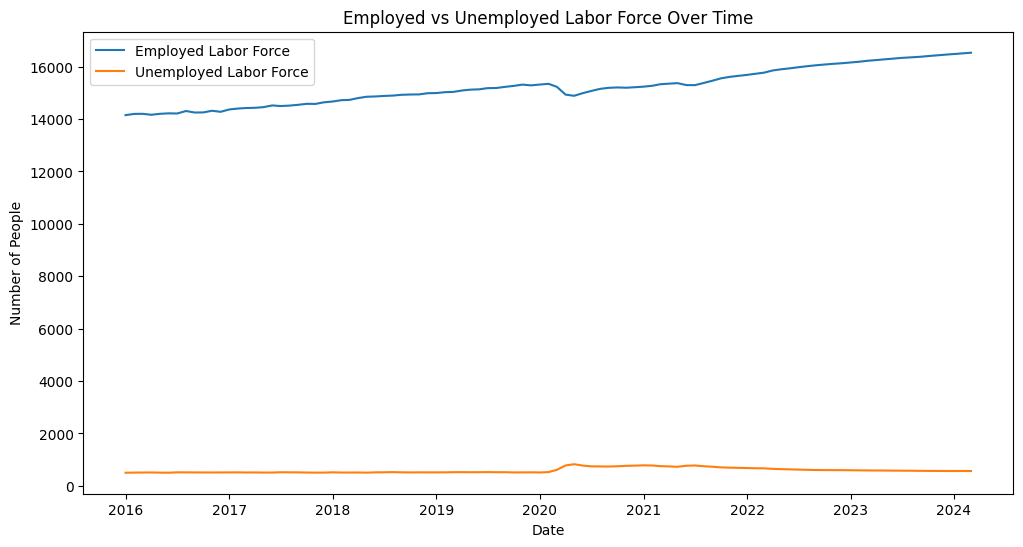

In [ ]:
import matplotlib.pyplot as plt

# Line plot for employed and unemployed labor force over time
plt.figure(figsize=(12, 6))
plt.plot(dw_df['date'], dw_df['lf_employed'], label='Employed Labor Force')
plt.plot(dw_df['date'], dw_df['lf_unemployed'], label='Unemployed Labor Force')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Employed vs Unemployed Labor Force Over Time')
plt.legend()
plt.show()


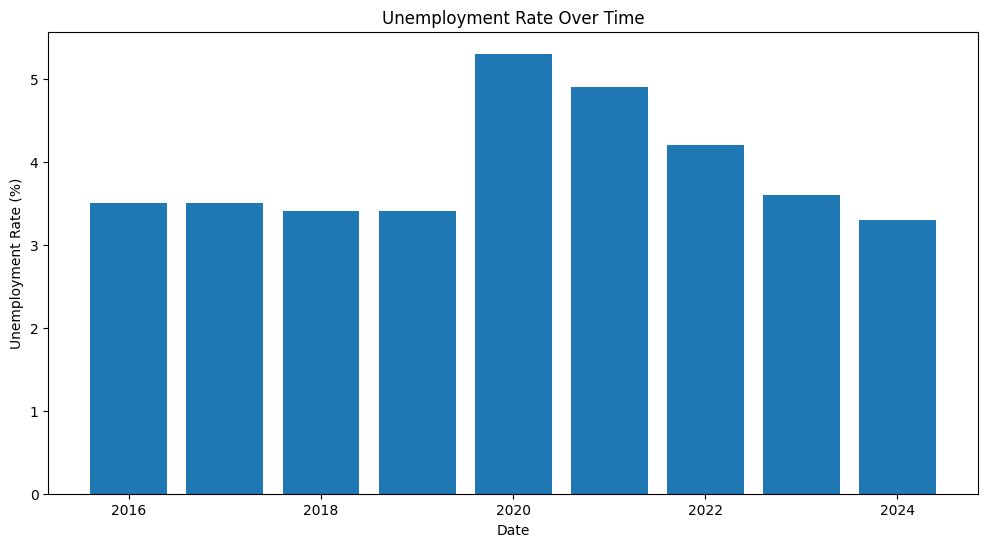

In [ ]:
# Bar chart for unemployment rate
plt.figure(figsize=(12, 6))
plt.bar(dw_df['year'], dw_df['u_rate'])
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.show()


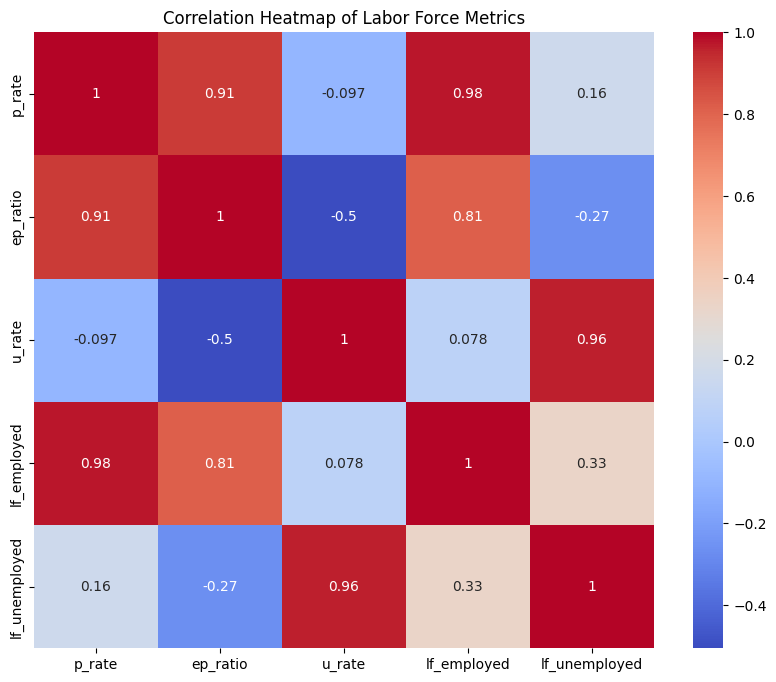

In [ ]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dw_df[['p_rate', 'ep_ratio', 'u_rate', 'lf_employed', 'lf_unemployed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Labor Force Metrics')
plt.show()


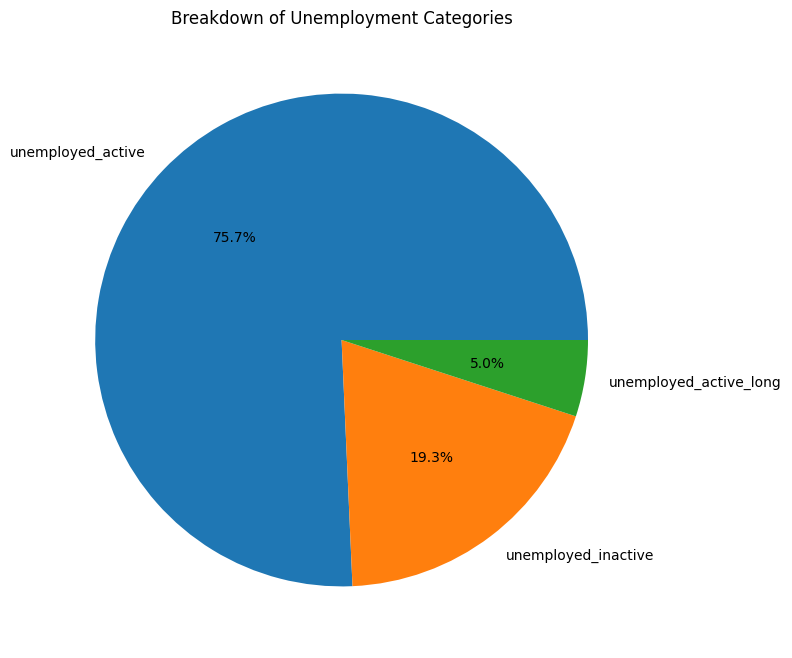

In [ ]:
# Pie chart for breakdown of unemployment categories
unemployment_categories = dw_df.loc[dw_df['date'] == dw_df['date'].max(), ['unemployed_active', 'unemployed_inactive', 'unemployed_active_long']].iloc[0]
plt.figure(figsize=(8, 8))
plt.pie(unemployment_categories, labels=unemployment_categories.index, autopct='%1.1f%%')
plt.title('Breakdown of Unemployment Categories')
plt.show()


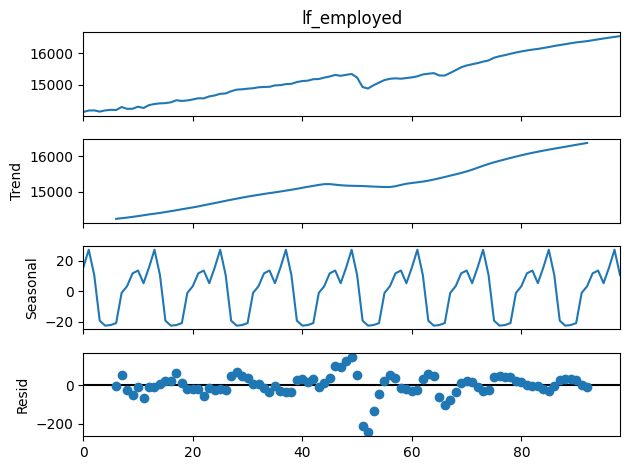

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of employed labor force
result = seasonal_decompose(dw_df['lf_employed'], model='additive', period=12)
result.plot()
plt.show()


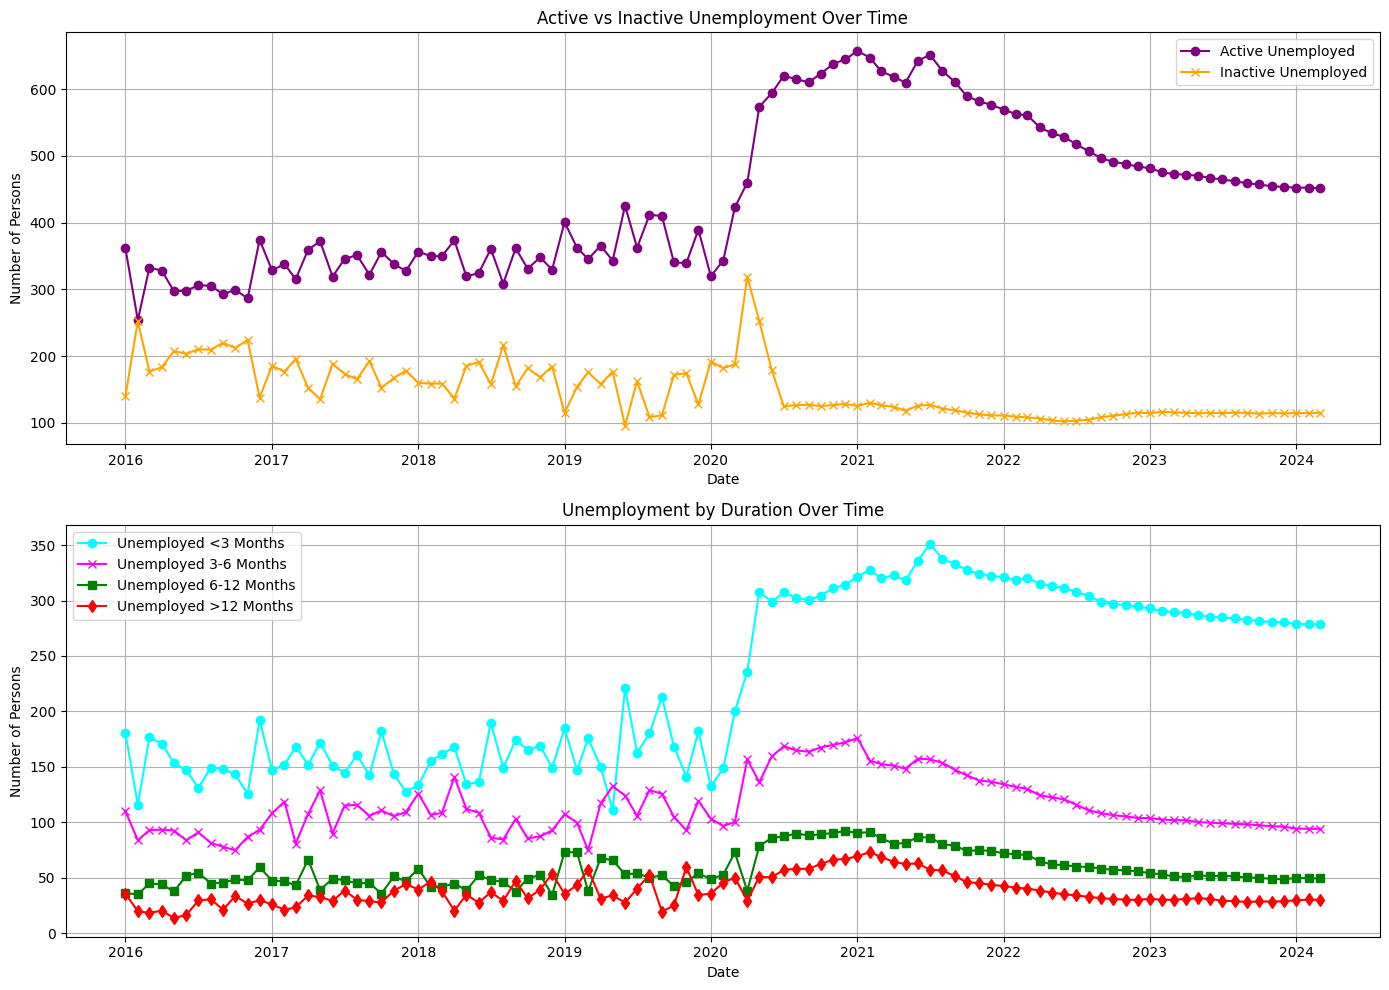

In [ ]:
# Plotting unemployment categories over time
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(dw_df['date'], dw_df['unemployed_active'], label='Active Unemployed', color='purple', marker='o')
plt.plot(dw_df['date'], dw_df['unemployed_inactive'], label='Inactive Unemployed', color='orange', marker='x')
plt.title('Active vs Inactive Unemployment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Persons')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(dw_df['date'], dw_df['unemployed_active_3mo'], label='Unemployed <3 Months', color='cyan', marker='o')
plt.plot(dw_df['date'], dw_df['unemployed_active_6mo'], label='Unemployed 3-6 Months', color='magenta', marker='x')
plt.plot(dw_df['date'], dw_df['unemployed_active_12mo'], label='Unemployed 6-12 Months', color='green', marker='s')
plt.plot(dw_df['date'], dw_df['unemployed_active_long'], label='Unemployed >12 Months', color='red', marker='d')
plt.title('Unemployment by Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Persons')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


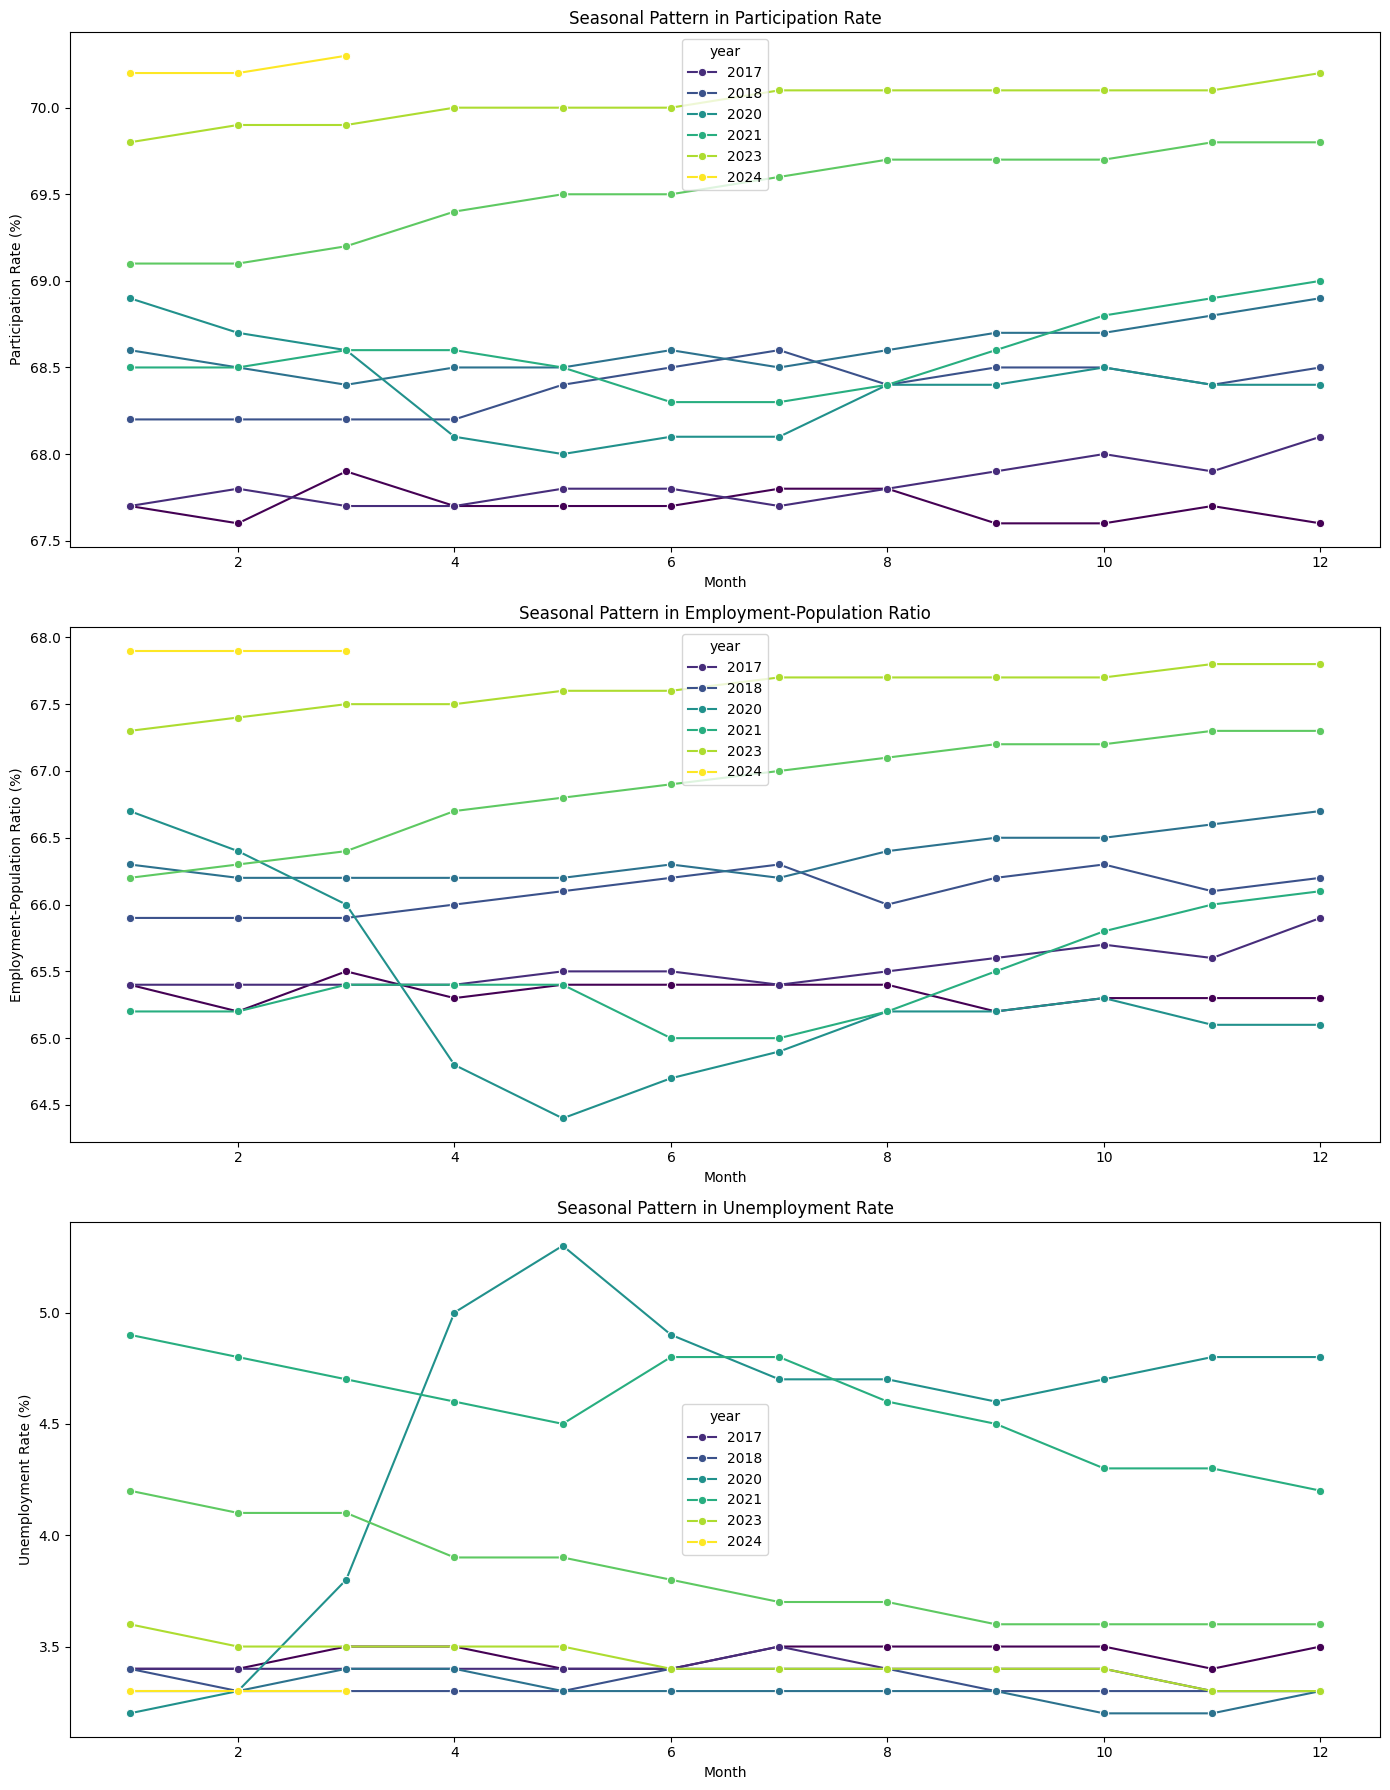

In [ ]:
# Plotting seasonal trends
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Participation Rate Seasonal Pattern
sns.lineplot(data=dw_df, x='month', y='p_rate', hue='year', marker='o', ax=axes[0], palette='viridis')
axes[0].set_title('Seasonal Pattern in Participation Rate')
axes[0].set_ylabel('Participation Rate (%)')
axes[0].set_xlabel('Month')

# Employment-Population Ratio Seasonal Pattern
sns.lineplot(data=dw_df, x='month', y='ep_ratio', hue='year', marker='o', ax=axes[1], palette='viridis')
axes[1].set_title('Seasonal Pattern in Employment-Population Ratio')
axes[1].set_ylabel('Employment-Population Ratio (%)')
axes[1].set_xlabel('Month')

# Unemployment Rate Seasonal Pattern
sns.lineplot(data=dw_df, x='month', y='u_rate', hue='year', marker='o', ax=axes[2], palette='viridis')
axes[2].set_title('Seasonal Pattern in Unemployment Rate')
axes[2].set_ylabel('Unemployment Rate (%)')
axes[2].set_xlabel('Month')

plt.tight_layout()
plt.show()


In [ ]:
# Convert 'date' column to datetime and set as index
dw_df['date'] = pd.to_datetime(dw_df['date'])
dw_df.set_index('date', inplace=True)

# Focus on the 'u_rate' column
u_rate_series = dw_df['u_rate']

u_rate_series.head()


date
2016-01-01    3.4
2016-02-01    3.4
2016-03-01    3.5
2016-04-01    3.5
2016-05-01    3.4
Name: u_rate, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
u_rate_scaled = scaler.fit_transform(u_rate_series.values.reshape(-1, 1))

# Function to convert time series data into supervised data format
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Prepare the input data using a look_back of 1 month
look_back = 1
X, y = create_dataset(u_rate_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, trainY = X[0:train_size], y[0:train_size]
testX, testY = X[train_size:], y[train_size:]

trainX.shape, trainY.shape, testX.shape, testY.shape


((64, 1, 1), (64,), (33, 1, 1), (33,))

In [ ]:
# Convert 'date' column to datetime and set as index
dw_df['date'] = pd.to_datetime(dw_df['date'])
dw_df.set_index('date', inplace=True)

# Focus on the 'u_rate' column
u_rate_series = dw_df['u_rate']

u_rate_series.head()

